# Part II - Factors that affect Prosper's loans outcome status, and borrower’s APR

## by Jessie Ifeanyi

## Investigation Overview

For this investigation, I was most interested in figuring out what factors affect a loan’s outcome status, what affects the borrower’s APR, if there are differences between loans depending on employment status.


### Qualitative Variables:

* LoanStatus - Whether a loan is Cancelled, Chargedoff (The worst one), Completed, Current, Defaulted, FinalPaymentInProgress, or PastDue.
* Term - Months of loan; Although this sounds quantitative, there are only 12 month, 36 month, and 60 month loans.

* CreditGrade (Pre-2009 only) 

* ProsperRating_Alpha - Prosper Rating assigned to loan at the beginning. There is a numeric version, but since we're dealing with a categorical datatype, we will opt to just look at the Alpha version. (Post 2009 only)

* CreditRating - Combined variable between CreditGrade and ProsperRating (Alpha). We will check to see if our analysis shows anything different with this variable.

* ListingCategory - Type of listing that the loan falls under

* BorrowerState - 2 letter abbreviation of where the loan was created for (Might be interesting to pair with the statuses)

* EmploymentStatus - of Borrower

* CreditRange - Since the delta value between the Upper value and the Lower value is 19 for all of the rows, we can safely just create a range between these bounds.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
!pip install Pillow
from PIL import Image

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe, print statistics
loans = pd.read_csv('prosperLoanData.csv')

## (Visualization 1)

Prosper Loans gave move of its loans to employed customers. This is good because they are more likely to have the capacity to payback their loans. So most of the loans are medium term loans (for 36 months) while annual loans are so few, even negligible. 

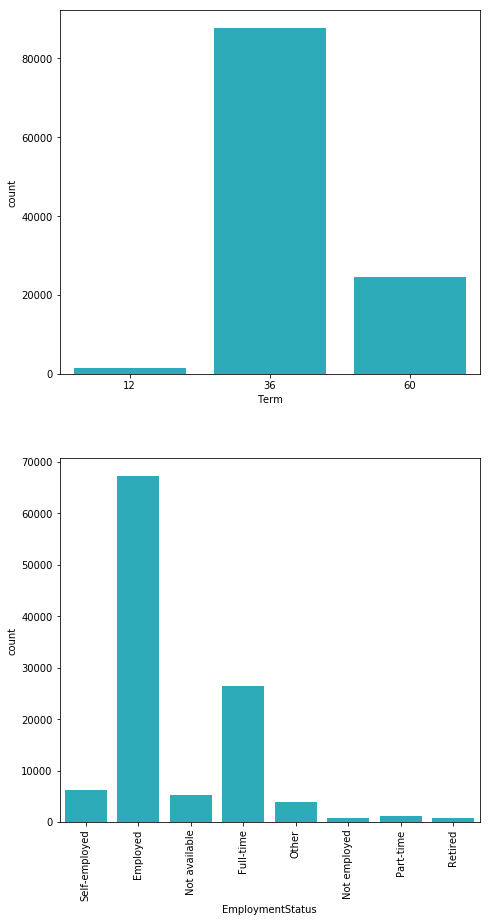

<DisplayHandle display_id=How are the borrowers Employment Status and their loan term distributed?>

In [3]:
display(Image.open("output2.png"), display_id= 'How are the borrowers Employment Status and their loan term distributed?')

## (Visualization 2)

Let's see what further investagation on what happened before and after 2009 with regards Prosper credit rating/grade.

The Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA. Applicable for loans originated after July 2009. The illustrations shows most loans rating lie between A and D (3-6) which is fair enough. Both data are slightly normally distributed

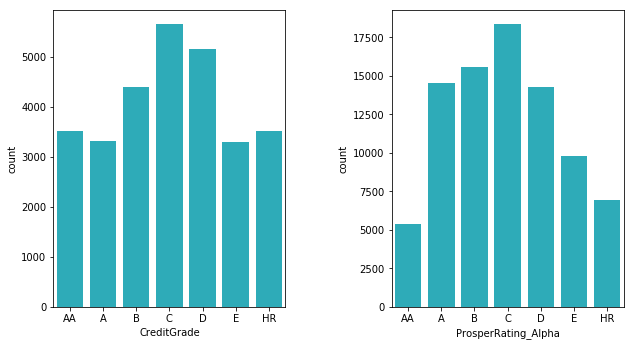

<DisplayHandle display_id=Prosper Credit Reating Before and After 2009>

In [4]:
display(Image.open("output4.png"), display_id= 'Prosper Credit Reating Before and After 2009')

## (Visualization 3)

Another important feature we explore here is the BorrowerAPR. This is the Borrower's Annual Percentage Rate (APR) for the loan. The insights tells us that on the average the APR lie between 10 and 35%, averagely 20%. Loans APR even go as high as 40%. The might increase the likelihood of incurring bad debts.

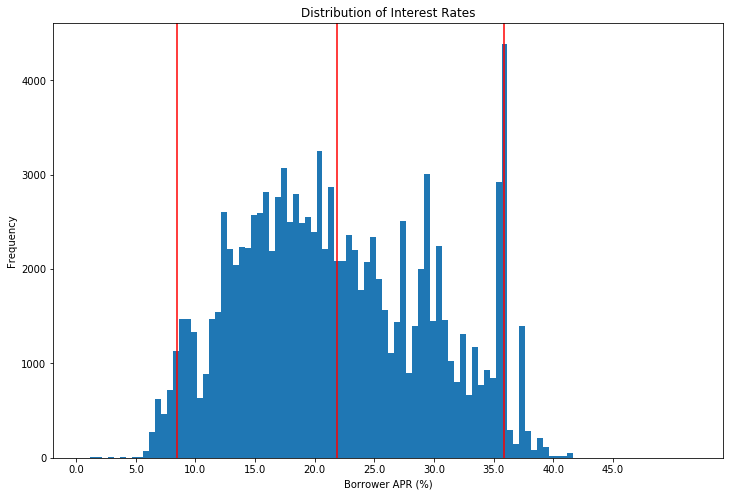

In [5]:
display(Image.open("output7.png"))

## (Visualization 4)

The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans.

This is a bad indicator, Most people are taking Prosper loans to pay off other loans they already incurred. The likelihood of these turning out to be good debt is low as they are current not capable of paying of previous debt themselves

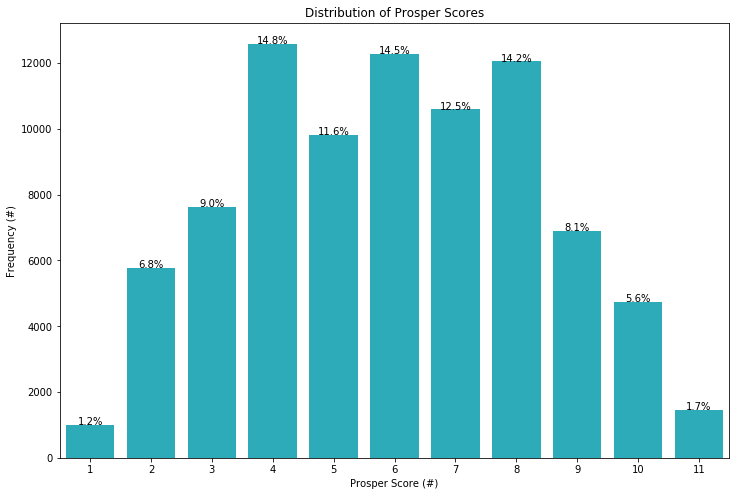

In [6]:
display(Image.open("output10.png"))

## (Visualization 5)

Looking at the pairwise correlations present between features in the data.

As expected, there is a negative correlation between Credit Score and Borrower APR since the lower the credit score, the higher the borrower APR in case of delinquencies. However, there is no significant correlation between TotalProsperLoans vs Amount deliquent.

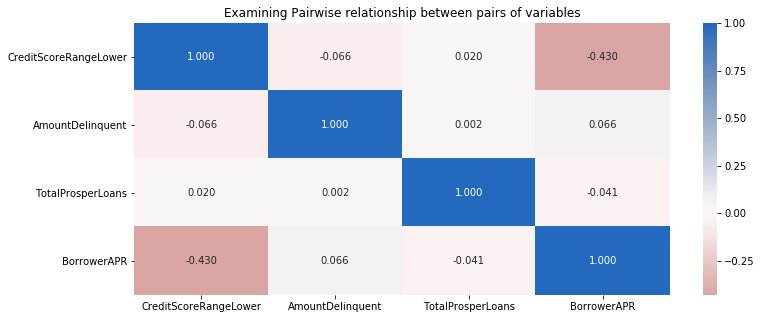

<DisplayHandle display_id=Pairwise Correlation>

In [7]:
display(Image.open("heatmap.png"), display_id= 'Pairwise Correlation')

## (Visualization 6)

Noticeably higher Borrower APR as we get worse in loan status Defaulted and Chargedoff loans have a Borrower APR above average Completed and Current loans have a Borrower APR below average To get the highest Borrower APR, get the loan Past Due (> 120 days) or Chargedoff

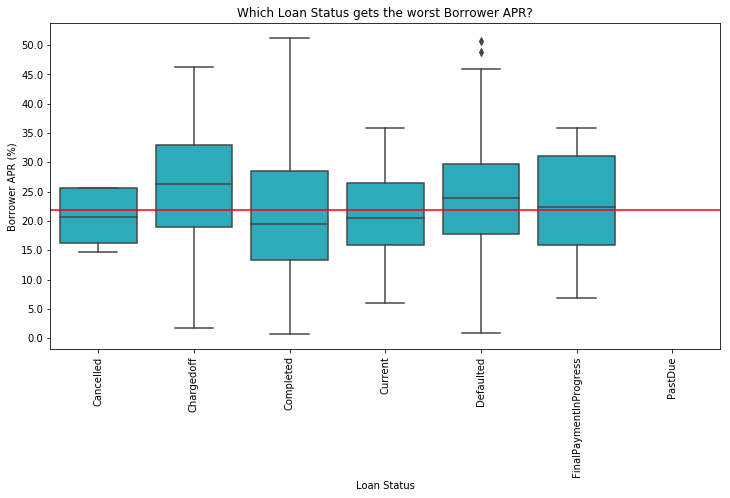

<DisplayHandle display_id=Relationship Between Loan and Borrower APR>

In [8]:
display(Image.open("output13.png"), display_id= 'Relationship Between Loan and Borrower APR')

## (Visualization 7)

Using a pairgrid does not provide us much information, however, when we used a simple scatter plot Borrowers APR vs Credit Score while using Listing Category as the color bar, it provides us a different view.

Recall, The CreditScoreRangeLower represents data for lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency. 

The scatter plot above shows that the borrower's credit score and the borrower APR has no corellation in themselves. as shown the darker purple at the top indicating high credit scores and borrowing for debt consolidation

This shows us that high credit score does not mean borrowing for other reasons other than debt repayment.

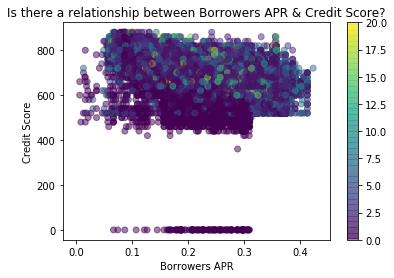

<DisplayHandle display_id=Relationship Between Borrower APR and Credit Score>

In [9]:
display(Image.open("Visualization_8.png"), display_id ='Relationship Between Borrower APR and Credit Score')

In [10]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Part_II_slide_deck_template.ipynb'])

0

In [ ]:
 !jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve  --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 535883 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/